# Appliance Energy Prediction

# Project Summary
The data set is at 10 min for about 3 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network.Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes. The energy data was logged every 10 minutes with m-bus energy metres. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes. You need to
predict the energy use of appliances.

# Importing all the necessary library for this project

In [319]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import datetime

In [320]:
pwd

'C:\\Users\\kriti'

# Importing the data from database(DATA READING)
Data set stored in a df named variable.

In [321]:
df=pd.read_csv('data_application_energy.csv')

#Data set first view/top

In [322]:
df.head(1)

date  Appliances  lights     T1       RH_1    T2   RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.79   

      T3   RH_3    T4  ...         T9   RH_9  T_out  Press_mm_hg  RH_out  \
0  19.79  44.73  19.0  ...  17.033333  45.53    6.6        733.5    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        7.0        63.0        5.3  13.275433  13.275433  

[1 rows x 29 columns]

#Data set last view/bottom 

In [323]:
df.tail(1)

date  Appliances  lights    T1  RH_1         T2  \
19734  2016-05-27 18:00:00         430      10  25.5  46.6  25.264286   

            RH_2         T3       RH_3    T4  ...    T9    RH_9  T_out  \
19734  42.971429  26.823333  41.156667  24.7  ...  23.2  46.845   22.2   

       Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
19734        755.2    57.0        4.0        27.0       13.2  34.118851   

             rv2  
19734  34.118851  

[1 rows x 29 columns]

#Data set shape and size (Rows, Columns)

In [324]:
df.shape

(19735, 29)

# EDA PART & FEATURE ENGINEERING

#Finding Null values in data set

In [325]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#Checking data set information(Data types,Null value count,column)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#checking dataset different parameters that helps to understand the data set.(eg like count,mean,std,min) and also getting ideasabout ouliers.

In [327]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

#cheking column names 

In [328]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

#Rename the column name of data set for better understanding in Future or it means that easy to understood everyone.

In [329]:
df1=df.rename(columns={'date':'Date', 'Appliances':'Appliances_energy', 'lights':'Lights_watt', 'T1':'Kitchen_T', 'RH_1':'Kitchen_H', 'T2':'Livingroom_T', 'RH_2':'Livingroom_H', 'T3':'Laundaryroom_T', 'RH_3':'Laundaryroom_H', 'T4':'Officeroom_T', 'RH_4':'Officeroom_H', 'T5':'Bathroom_T', 'RH_5':'Bathroom_H', 'T6':'Outside_buil(Northside)_T', 'RH_6':'Outside_buil(Northside)_H', 'T7':'Ironingroom_T', 'RH_7':'Ironingroom_H', 'T8':'Teenagerroom_T', 'RH_8':'Teenagerroom_H', 'T9':'Parentsroom_T', 'RH_9':'Parentsroom_H', 'T_out':'Temp_outside', 'Press_mm_hg':'Pressure_load', 'RH_out':'Outside_H', 'Windspeed':'Windspeed_m/s', 'Visibility':'visiblity_dis', 'Tdewpoint':'Dew_temp', 'rv1':'Reserve_energy1', 'rv2':'Reserve_energy2'})

#Cheking duplicates values in the data set.

In [330]:
df1[df1.duplicated()]

Empty DataFrame
Columns: [Date, Appliances_energy, Lights_watt, Kitchen_T, Kitchen_H, Livingroom_T, Livingroom_H, Laundaryroom_T, Laundaryroom_H, Officeroom_T, Officeroom_H, Bathroom_T, Bathroom_H, Outside_buil(Northside)_T, Outside_buil(Northside)_H, Ironingroom_T, Ironingroom_H, Teenagerroom_T, Teenagerroom_H, Parentsroom_T, Parentsroom_H, Temp_outside, Pressure_load, Outside_H, Windspeed_m/s, visiblity_dis, Dew_temp, Reserve_energy1, Reserve_energy2]
Index: []

[0 rows x 29 columns]

# What did you know about your dataset?
After understanding the data I got to know that this data set contains 19735 rows and 29 columns in data set .There is no null values in the data set.There is no duplicate values in the data . This information very helpful for our model creation because here we don't need to treat null values and no need to remove duplicates in the data set.
The columns are date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8','RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2'.All columns showing differnt parameters some columns showing temp of inside house , some columns showing humidity of house,visiblity from outside ,Appliance usage and others.

#Creating a graph that shows the null values in the data (eg Distplot)

C:\Users\kriti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

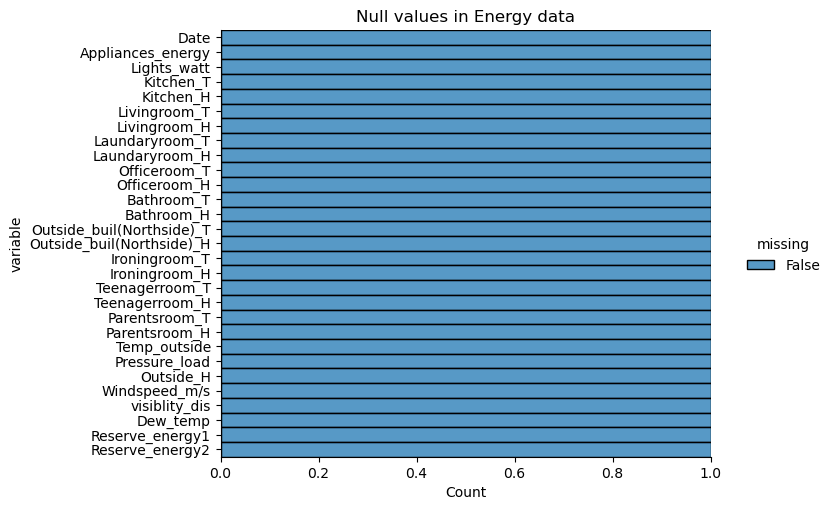

In [331]:
plt.figure(figsize=(10,10))
sns.displot(data=df1.isna().melt(value_name='missing'),y='variable',hue='missing',multiple='fill',aspect=1.50)
plt.title('Null values in Energy data')
plt.show()


In [332]:
#checking No of unique unique values in Each column that helps to search the duplicate values in the data set. 

In [333]:
def get_uniquevalues(df1):
    unique_values=df1.apply
    return unique_values

unq_values=get_uniquevalues(df1)

for i in df1.columns.tolist():
    print('No of unique values in', i, 'is', df1[i].nunique())

No of unique values in Date is 19735
No of unique values in Appliances_energy is 92
No of unique values in Lights_watt is 8
No of unique values in Kitchen_T is 722
No of unique values in Kitchen_H is 2547
No of unique values in Livingroom_T is 1650
No of unique values in Livingroom_H is 3376
No of unique values in Laundaryroom_T is 1426
No of unique values in Laundaryroom_H is 2618
No of unique values in Officeroom_T is 1390
No of unique values in Officeroom_H is 2987
No of unique values in Bathroom_T is 2263
No of unique values in Bathroom_H is 7571
No of unique values in Outside_buil(Northside)_T is 4446
No of unique values in Outside_buil(Northside)_H is 9709
No of unique values in Ironingroom_T is 1955
No of unique values in Ironingroom_H is 5891
No of unique values in Teenagerroom_T is 2228
No of unique values in Teenagerroom_H is 6649
No of unique values in Parentsroom_T is 924
No of unique values in Parentsroom_H is 3388
No of unique values in Temp_outside is 1730
No of unique v

In [334]:
for i in df1.columns.tolist():
    print('No of unique values in', i, 'is', df1[i].nunique())

No of unique values in Date is 19735
No of unique values in Appliances_energy is 92
No of unique values in Lights_watt is 8
No of unique values in Kitchen_T is 722
No of unique values in Kitchen_H is 2547
No of unique values in Livingroom_T is 1650
No of unique values in Livingroom_H is 3376
No of unique values in Laundaryroom_T is 1426
No of unique values in Laundaryroom_H is 2618
No of unique values in Officeroom_T is 1390
No of unique values in Officeroom_H is 2987
No of unique values in Bathroom_T is 2263
No of unique values in Bathroom_H is 7571
No of unique values in Outside_buil(Northside)_T is 4446
No of unique values in Outside_buil(Northside)_H is 9709
No of unique values in Ironingroom_T is 1955
No of unique values in Ironingroom_H is 5891
No of unique values in Teenagerroom_T is 2228
No of unique values in Teenagerroom_H is 6649
No of unique values in Parentsroom_T is 924
No of unique values in Parentsroom_H is 3388
No of unique values in Temp_outside is 1730
No of unique v

In [335]:
#Creating a new variable and putting df1 to df_Energy for better understanding .

In [336]:
df_Energy=df1

In [337]:
#changing Datatype of date column into date time to Perform more feature engineering.

In [338]:
df_Energy['Date']=pd.to_datetime(df_Energy['Date'])

In [339]:
# After converting Data type of date ,checking information of dataset.

In [340]:
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       19735 non-null  datetime64[ns]
 1   Appliances_energy          19735 non-null  int64         
 2   Lights_watt                19735 non-null  int64         
 3   Kitchen_T                  19735 non-null  float64       
 4   Kitchen_H                  19735 non-null  float64       
 5   Livingroom_T               19735 non-null  float64       
 6   Livingroom_H               19735 non-null  float64       
 7   Laundaryroom_T             19735 non-null  float64       
 8   Laundaryroom_H             19735 non-null  float64       
 9   Officeroom_T               19735 non-null  float64       
 10  Officeroom_H               19735 non-null  float64       
 11  Bathroom_T                 19735 non-null  float64       
 12  Bath

In [341]:
#Performing Feature Engineering to Extract (Month,weekday,hour,week,day of week,week of month)from date column and then dropm them .

In [342]:
df_Energy['month'] = df_Energy['Date'].dt.month
df_Energy['weekday'] = df_Energy['Date'].dt.weekday
df_Energy['hour'] = df_Energy['Date'].dt.hour
df_Energy['week'] = df_Energy['Date'].dt.isocalendar().week
df_Energy['day_of_week'] = df_Energy['Date'].dt.day_name()
df_Energy['week_of_month'] = (df_Energy['Date'].dt.day-1) // 7 + 1


df_Energy.drop('Date',axis=1,inplace=True)

df_Energy.head(1)

Appliances_energy  Lights_watt  Kitchen_T  Kitchen_H  Livingroom_T  \
0                 60           30      19.89  47.596667          19.2   

   Livingroom_H  Laundaryroom_T  Laundaryroom_H  Officeroom_T  Officeroom_H  \
0         44.79           19.79           44.73          19.0     45.566667   

   ...  visiblity_dis  Dew_temp  Reserve_energy1  Reserve_energy2  month  \
0  ...           63.0       5.3        13.275433        13.275433      1   

   weekday  hour  week  day_of_week  week_of_month  
0        0    17     2       Monday              2  

[1 rows x 34 columns]

In [343]:
# Using replace(map) function to day of week to better visulization through heatmap chart.

In [344]:
#Define a dictionary mapping day names to numerical representations
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Assuming 'day_of_week' is the name of the column containing day of week information
df_Energy['day_of_week'] = df_Energy['day_of_week'].map(day_mapping)

# Convert the column to float type
df_Energy['day_of_week'] = df_Energy['day_of_week'].astype(float)

In [350]:
df_Energy.corr()

Appliances_energy  Lights_watt  Kitchen_T  \
Appliances_energy                   1.000000     0.197278   0.055447   
Lights_watt                         0.197278     1.000000  -0.023528   
Kitchen_T                           0.055447    -0.023528   1.000000   
Kitchen_H                           0.086031     0.106968   0.164006   
Livingroom_T                        0.120073    -0.005622   0.836834   
Livingroom_H                       -0.060465     0.050985  -0.002509   
Laundaryroom_T                      0.085060    -0.097393   0.892402   
Laundaryroom_H                      0.036292     0.131161  -0.028550   
Officeroom_T                        0.040281    -0.008859   0.877001   
Officeroom_H                        0.016965     0.114936   0.097861   
Bathroom_T                          0.019760    -0.078745   0.885247   
Bathroom_H                          0.006955     0.141233  -0.014782   
Outside_buil(Northside)_T           0.117638    -0.079029   0.654769   
Outside_buil(Northside)_H          -0.083178     0.153756  -0.615045   
Ironingroom_T                       0.025801    -0.135347   0.838705   
Ironingroom_H                      -0.055642     0.035069   0.135182   
Teenagerroom_T                      0.039572    -0.071458   0.825413   
Teenagerroom_H                     -0.094039     0.012915  -0.006441   
Parentsroom_T                       0.010010    -0.157592   0.844777   
Parentsroom_H                      -0.051462    -0.008766   0.071756   
Temp_outside                        0.099155    -0.074424   0.682846   
Pressure_load                      -0.034885    -0.010576  -0.150574   
Outside_H                          -0.152282     0.068543  -0.345481   
Windspeed_m/s                       0.087122     0.060281  -0.087654   
visiblity_dis                       0.000230     0.020038  -0.076210   
Dew_temp                            0.015353    -0.036322   0.571309   
Reserve_energy1                    -0.011145     0.000521  -0.006203   
Reserve_energy2                    -0.011145     0.000521  -0.006203   
month                              -0.011606    -0.179452   0.706305   
weekday                             0.003060    -0.099828   0.001381   
hour                                0.216792     0.255346   0.178858   
week                               -0.011356    -0.186486   0.694857   
day_of_week                         0.003060    -0.099828   0.001381   
week_of_month                       0.006851    -0.028146  -0.118993   

                           Kitchen_H  Livingroom_T  Livingroom_H  \
Appliances_energy           0.086031      0.120073     -0.060465   
Lights_watt                 0.106968     -0.005622      0.050985   
Kitchen_T                   0.164006      0.836834     -0.002509   
Kitchen_H                   1.000000      0.269839      0.797535   
Livingroom_T                0.269839      1.000000     -0.165610   
Livingroom_H                0.797535     -0.165610      1.000000   
Laundaryroom_T              0.253230      0.735245      0.137319   
Laundaryroom_H              0.844677      0.121497      0.678326   
Officeroom_T                0.106180      0.762066     -0.047304   
Officeroom_H                0.880359      0.231563      0.721435   
Bathroom_T                  0.205797      0.720550      0.110409   
Bathroom_H                  0.303258      0.029595      0.250271   
Outside_buil(Northside)_T   0.316141      0.801186     -0.009670   
Outside_buil(Northside)_H   0.245126     -0.580372      0.389933   
Ironingroom_T               0.021397      0.663660     -0.051422   
Ironingroom_H               0.801122      0.229212      0.690584   
Teenagerroom_T             -0.030053      0.578191     -0.041023   
Teenagerroom_H              0.736196      0.068534      0.679777   
Parentsroom_T               0.115263      0.675535      0.054544   
Parentsroom_H               0.764001      0.157346      0.676467   
Temp_outside                0.340767      0.792255      0.033674   
Pressure_l

In [345]:
# Creating heatmap chart to show correlation between dataset with each and every one in the data set

#annot=True in a seaborn heatmap means putting numbers on the colored squares. These numbers show how much two things are related. So, it helps you see exactly how different parts of your data are connected.

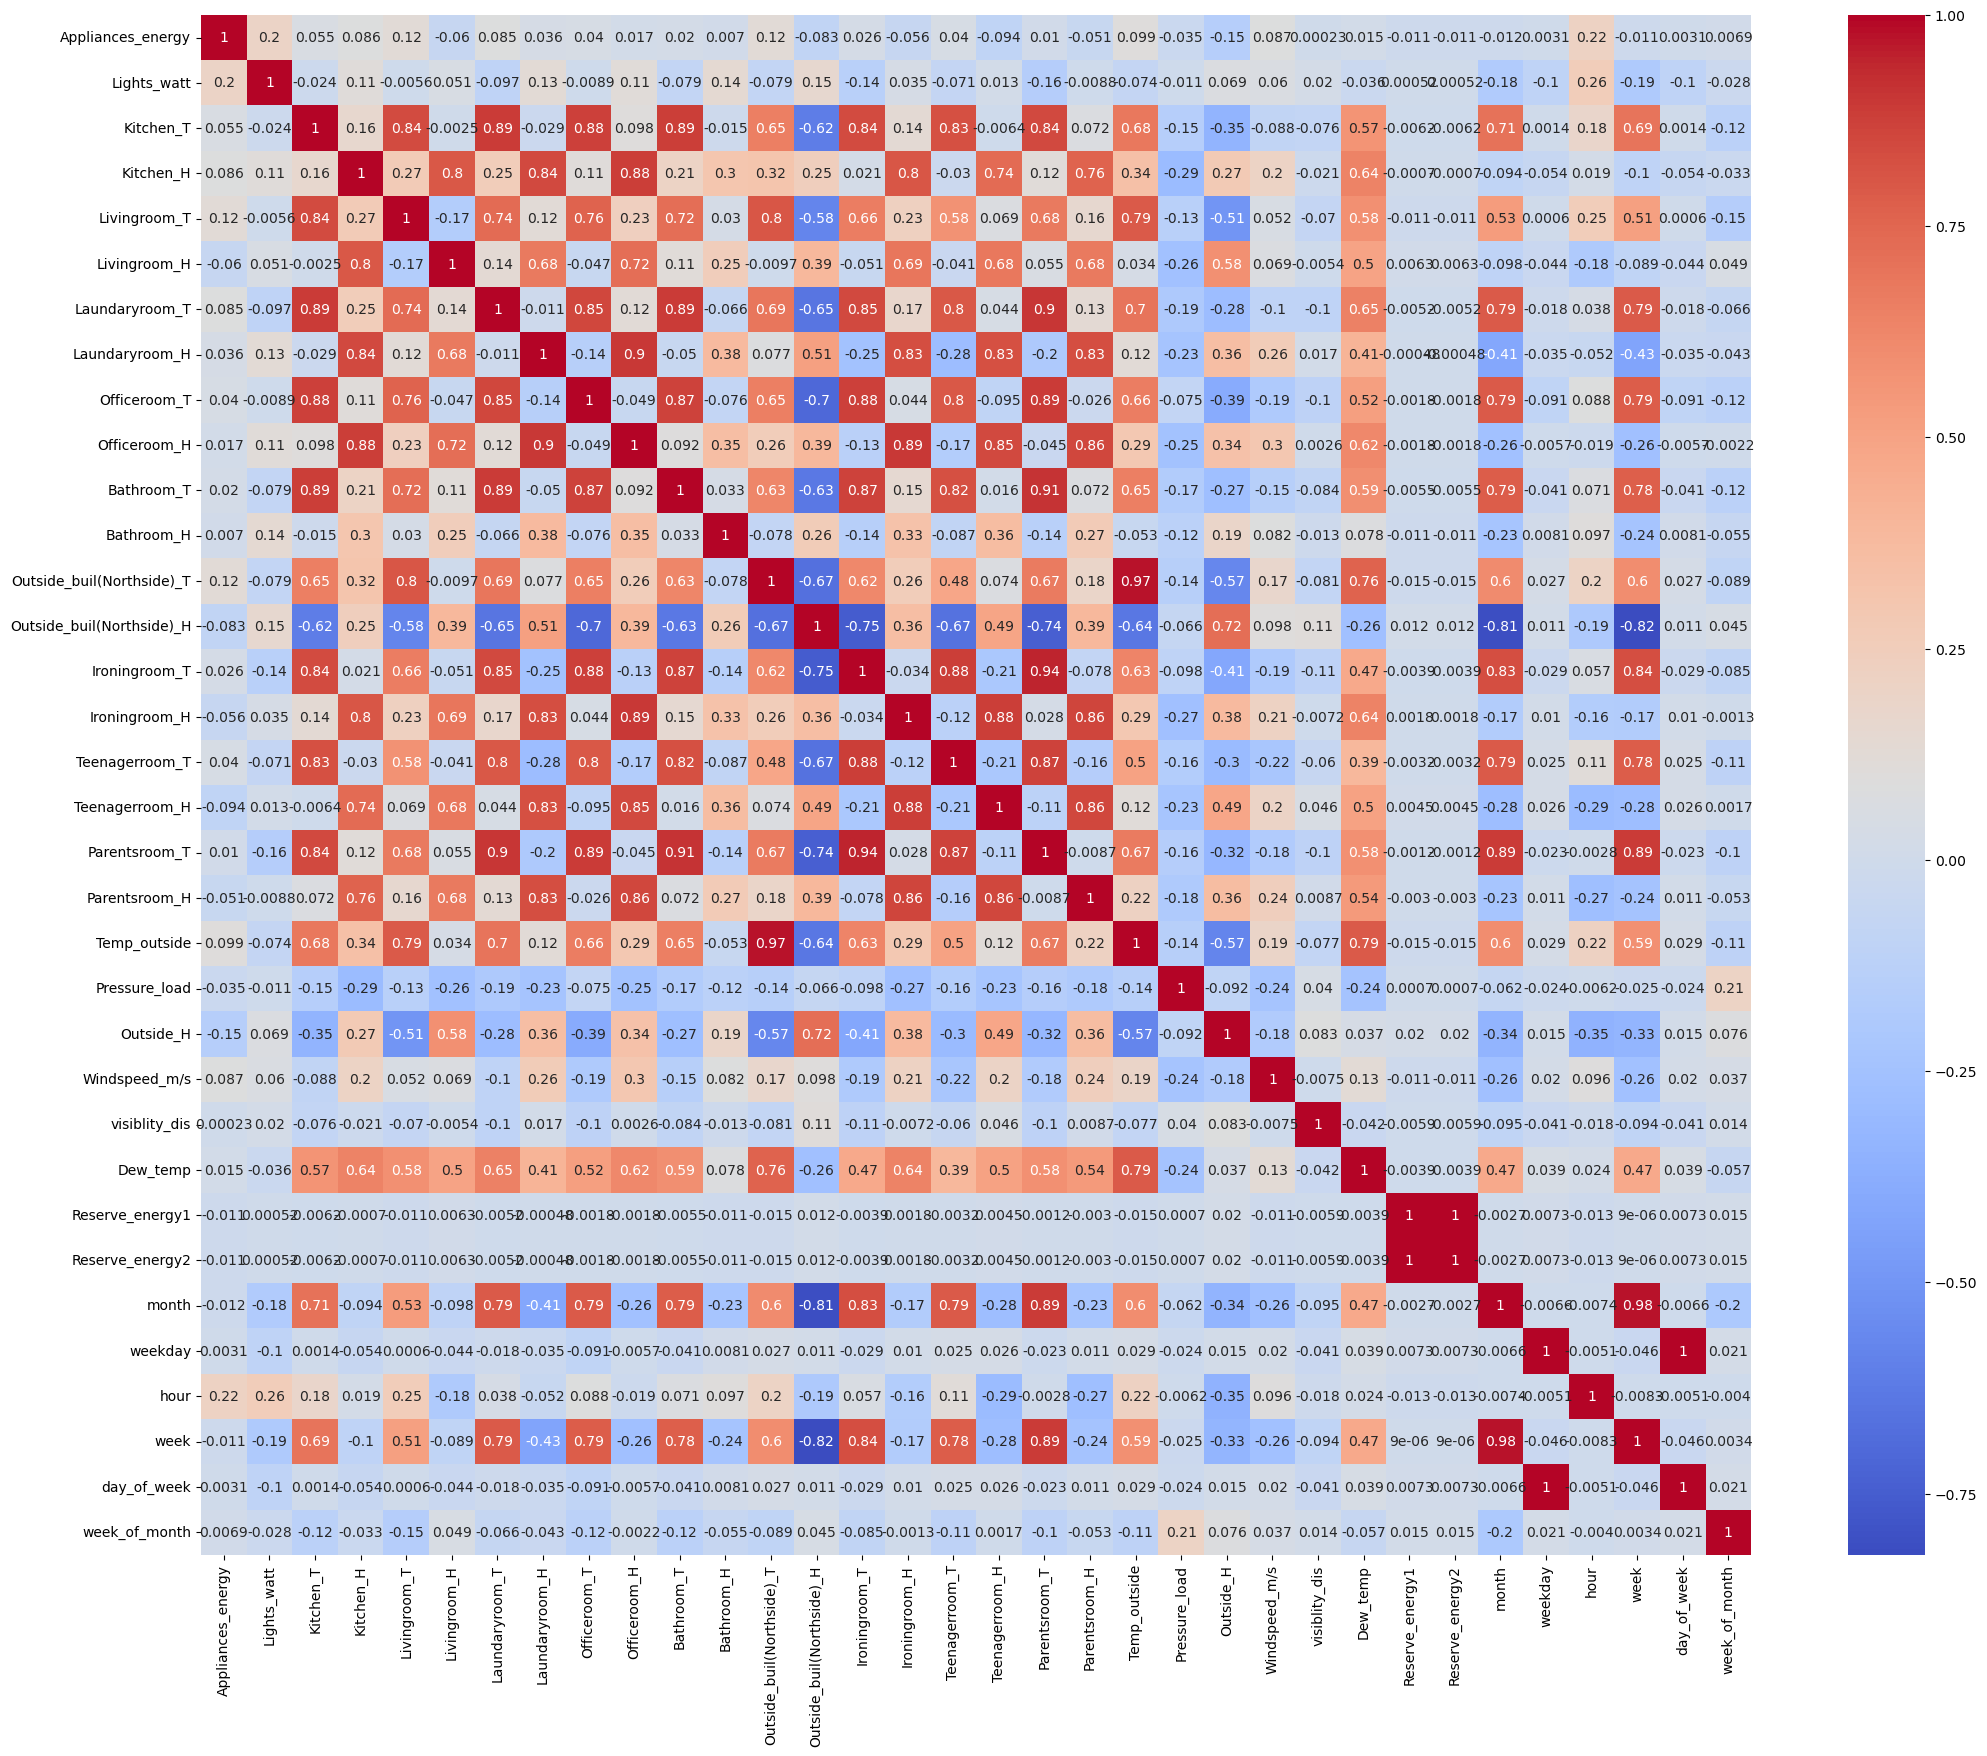

In [354]:
corr_matrix = df_Energy.corr()

# create the heatmap with a larger size
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# show the plot
plt.show()

# Why did you pick the specific chart?
heat map charts are powerful tools for visualizing data because they simplify complex datasets, highlight important patterns and relationships, and are versatile across various applications. Their ability to convey information through intuitive color gradients makes them indispensable in many fields for both analysis and communication.


# What is/are the insight(s) found from the chart?
Temperature Variables:

#Positive Correlation with Target (Appliances):
All temperature variables (T1-T8 and T_out) show positive correlation with the target variable Appliances.
This is expected since the HVAC system maintains consistent indoor temperatures across rooms.
#High Correlation Among Temperatures:
T6 and T_Out show high correlation. Since T6 (likely an indoor temperature sensor) is highly correlated with T_out (outdoor temperature), it indicates that T6 might not provide additional information.
Recommendation: Remove T6 from the training set to reduce redundancy and prevent multicollinearity. The information provided by T6 is already captured by T_out.
#Weather Attributes:

#Low Correlation with Target:
Variables such as Visibility, Tdewpoint, and Press_mm_hg have low correlation values with the target variable Appliances.
Recommendation: Consider removing these variables from the training set as they do not provide significant predictive power for the target variable.
#Humidity Sensors:

#No Significantly High Correlations:
There are no humidity sensors with correlations higher than 0.9 with the target variable.
Recommendation: Retain humidity variables for now, as they might still contribute some predictive value despite not having extremely high correlations.
#Random Variables:

#No Role to Play:
Variables identified as random or unrelated have no significant correlation with the target variable.
Recommendation: Remove random variables from the dataset as they do not contribute useful information for predicting Appliances.


# Cheking outliers with data with box plot.

<Axes: >

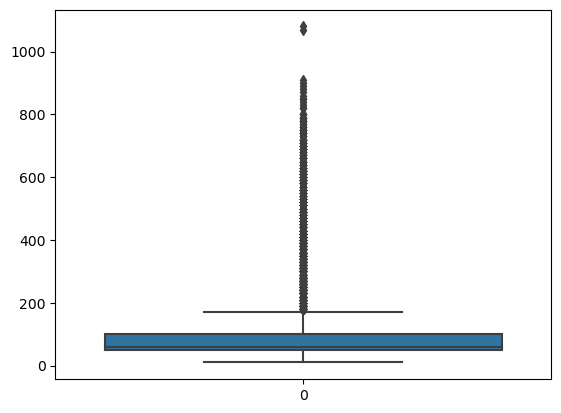

In [276]:
sns.boxplot(df_Energy['Appliances_energy'])

# Removing outliers
#After detecting outliers I applied Z-skore method to remove outliers from data and its leads that 11% data is removed by using z-skore method.
#By using for loop in dataset we are able to remove all outliers from data set.

In [277]:
df_Energy.shape

(19735, 34)

In [278]:
for col in df_Energy.columns:
  mean = df_Energy[col].mean()
  std = df_Energy[col].std()
  threshold = 3
  outliers = df_Energy[(df_Energy[col] - mean).abs() > threshold * std]
  df_Energy  = df_Energy.drop(outliers.index)

#After Removing outliers totat 89% data reamining in the data set,finally we started creating our dashboard visulization,models in demo data.

In [305]:
# After removing outliers i checked again information of data set.
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17107 entries, 27 to 19697
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Appliances_energy                  17107 non-null  int64  
 1   Lights_watt                        17107 non-null  int64  
 2   Kitchen_T                          17107 non-null  float64
 3   Kitchen_H                          17107 non-null  float64
 4   Livingroom_T                       17107 non-null  float64
 5   Livingroom_H                       17107 non-null  float64
 6   Laundaryroom_T                     17107 non-null  float64
 7   Laundaryroom_H                     17107 non-null  float64
 8   Officeroom_T                       17107 non-null  float64
 9   Officeroom_H                       17107 non-null  float64
 10  Bathroom_T                         17107 non-null  float64
 11  Bathroom_H                         17107 non-null  float64

#After removing ouliers from dataset ,checking shape of data

In [302]:
df_Energy.shape

(17107, 53)

#Converting datatype of week column to create visualization.

In [281]:
df_Energy['week'] = df_Energy['week'].astype(np.int32)

# Data visualization
Benefits of Data Visualization:
Enhanced Insight: Helps in deriving actionable insights from data quickly.
Improved Decision Making: Facilitates informed decision-making by providing clear visual summaries of data.
Better Communication: Allows for more effective communication of complex data and insights to stakeholders.
Increased Engagement: Interactive visualizations can engage users more effectively than static reports or spreadsheets.

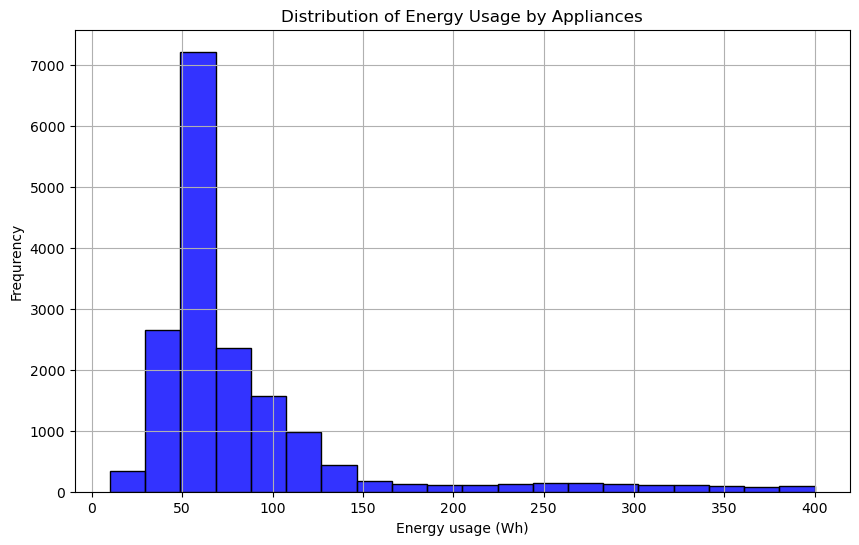

In [282]:
#  Plotting the distribution of energy useage by appliances using histogram.
plt.figure(figsize=(10,6))
sns.histplot(data=df_Energy, x='Appliances_energy',bins =20 ,color = 'blue', alpha =0.8)
plt.title('Distribution of Energy Usage by Appliances')
plt.xlabel('Energy usage (Wh)')
plt.ylabel('Frequrency')
plt.grid()
plt.show()

# Why did you pick the specific chart?
The specific chart chosen for this analysis is a histogram, which is a good choice for visualizing the distribution of energy usage by appliances in this case. Histograms are particularly useful for showing how often certain values occur in a dataset

# What is/are the insight(s) found from the chart?
The x-axis represents energy usage in watt-hours (Wh), and the y-axis represents frequency. The chart shows that most appliances use between 25 and 150 watt-hours of energy.

# Will the gained insights help creating a positive business impact?
Yes, the gained insights from the graph will likely help create a positive business impact. By understanding how much energy each appliance uses, businesses can:

Identify areas to improve energy efficiency: By spotting appliances that use a lot of energy, businesses can investigate ways to make them more efficient. This could involve upgrading to newer, more energy-efficient models, or implementing changes in how the appliances are used. Reduce energy costs: By using less energy, businesses can save money on their energy bills.

Meet environmental sustainability goals: Reducing energy consumption helps to conserve resources and reduce pollution. Overall, the insights gained from the graph can help businesses to save money, improve their environmental performance, and gain a competitive advantage.

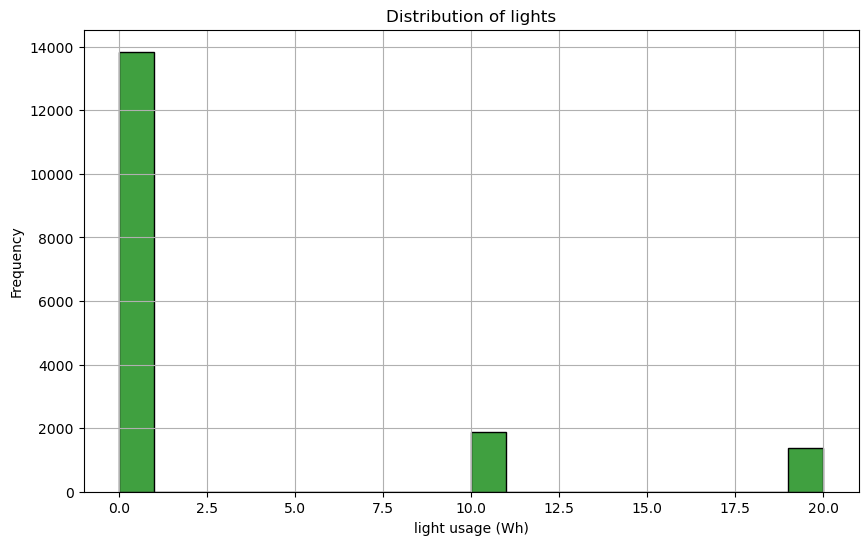

In [283]:
#  Plotting the distribution of Light 
plt.figure(figsize=(10,6),facecolor='white')
sns.histplot(data=df_Energy,x= 'Lights_watt',bins=20, color='green')
plt.title('Distribution of lights')
plt.xlabel('light usage (Wh)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Why this specific graph used?
histograms are a powerful tool in data visualization due to their ability to effectively summarize and present data distributions, facilitate pattern recognition, support comparative and quantitative analysis, and maintain simplicity and clarity.
# what are insights of this histogram?
The insight found from the chart is that the distribution of lights is increasing over time. This means that there is a higher frequency of houses using more lights as time goes on.


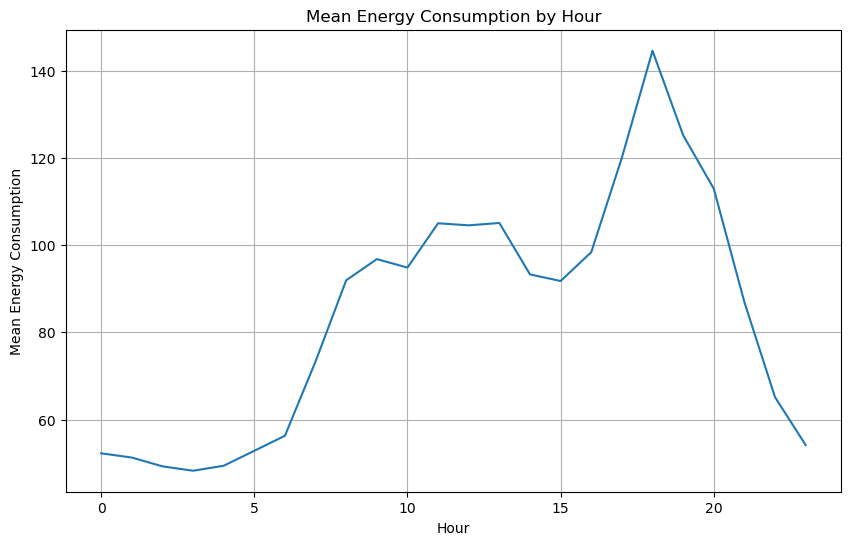

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [284]:
mean_by_hour = df_Energy.groupby('hour')['Appliances_energy'].mean()
mean_by_hour.plot(kind='line', figsize=(10, 6))
plt.title('Mean Energy Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Mean Energy Consumption')
plt.grid(True)
plt.show()
df.head()

# Why this specific graph used?
line charts are a powerful tool in data visualization due to their ability to effectively display trends, compare multiple data sets, and highlight changes over time while maintaining simplicity and clarity. They are particularly well-suited for time series analysis and any data where continuity and trend recognition are important.

# what are insights of this linechart?
The chart is that the mean energy consumption by hour is increasing over time. This is likely due to a number of factors, such as the time of day, the weather, and the climate.

The text at the bottom of the chart, however, says that the energy consumption is higher on weekdays than weekends. This contradicts what the chart itself shows. It is possible that the chart shows mean energy consumption by hour over a short period of time that just happens to encompass mostly weekdays.


# Here Feature Engineeering used for defining weekday and weekend.


In [285]:
df_Energy['type_of_day'] = np.where(df_Energy['day_of_week'] < 5, 'Weekday', 'Weekend')

<Figure size 800x300 with 0 Axes>

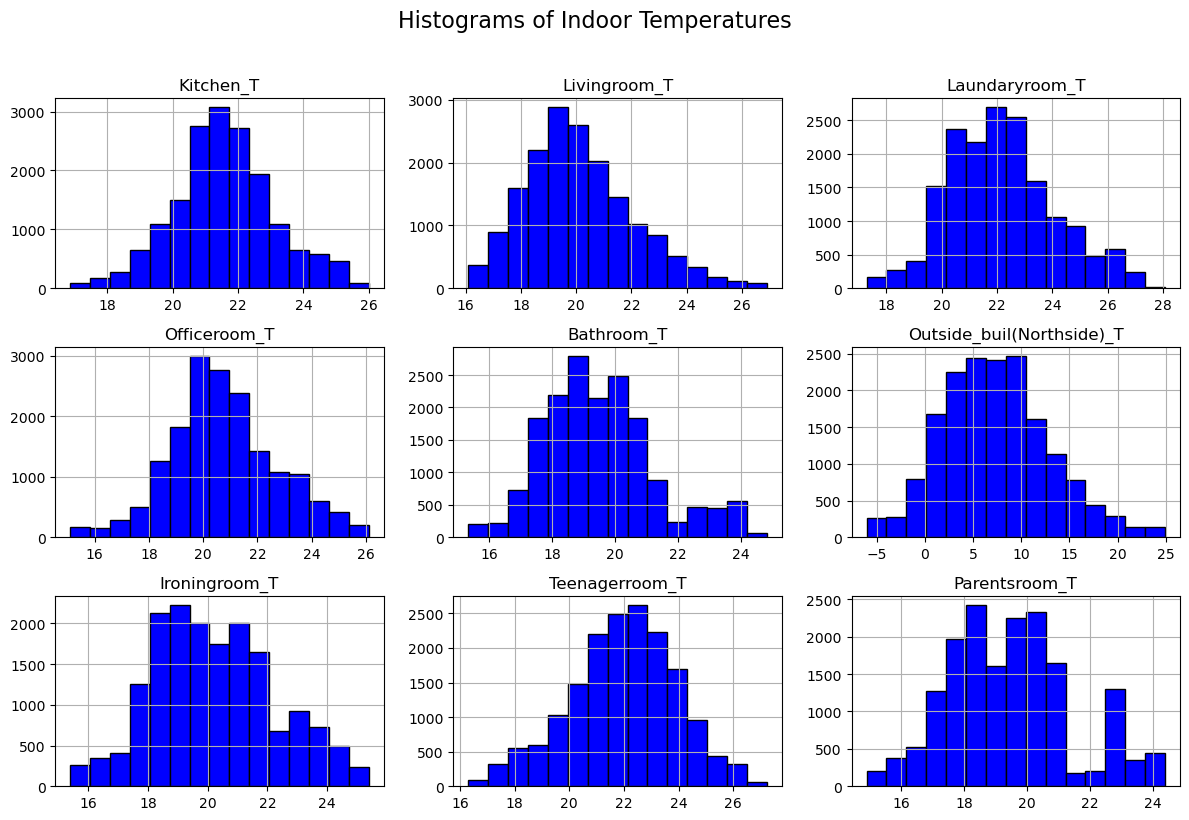

In [286]:
#  Plotting the distribution Temperatures of indoor
selected_columns = ['Kitchen_T','Livingroom_T','Laundaryroom_T','Officeroom_T','Bathroom_T','Outside_buil(Northside)_T','Ironingroom_T','Teenagerroom_T','Parentsroom_T']
plt.figure(figsize=(8, 3))
df_Energy[selected_columns].hist(bins=15, color='Blue',edgecolor='black', grid=True, layout=(3, 3), figsize=(12, 8))
plt.suptitle('Histograms of Indoor Temperatures', x=0.5, y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Why this specific graph used?
histograms are a powerful tool in data visualization due to their ability to effectively summarize and present data distributions, facilitate pattern recognition, support comparative and quantitative analysis, and maintain simplicity and clarity..
# what are insights of this histogram?
Each histogram displays the distribution of temperature readings for a particular sensor.
The x-axis of each histogram represents temperature, while the y-axis represents the number of readings that fall within each temperature range.

<Figure size 800x300 with 0 Axes>

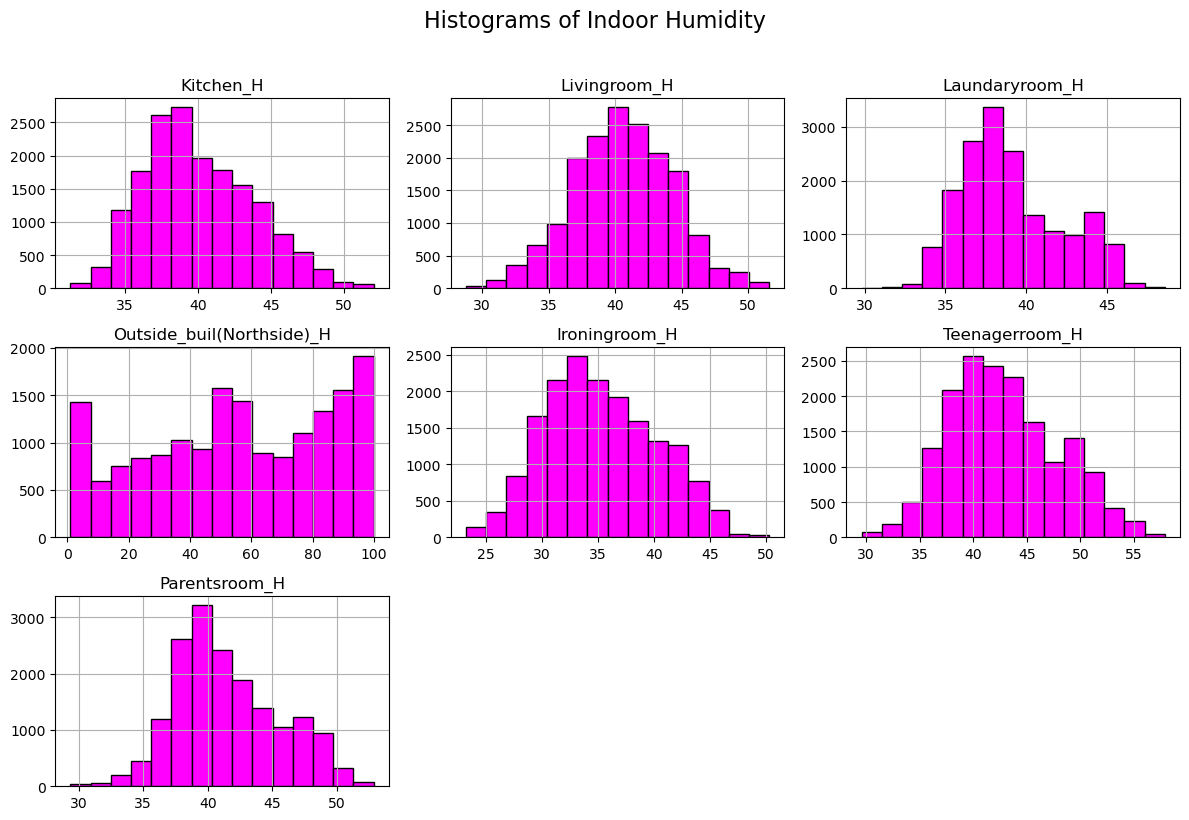

In [287]:
#  Plotting the distribution Humidity chart of indoor House.
selected_columns = ['Kitchen_H','Livingroom_H','Laundaryroom_H','Outside_buil(Northside)_H','Ironingroom_H','Teenagerroom_H','Parentsroom_H']
plt.figure(figsize=(8, 3))
df_Energy[selected_columns].hist(bins=15, color='magenta',edgecolor='black', grid=True, layout=(3, 3), figsize=(12, 8))
plt.suptitle('Histograms of Indoor Humidity', x=0.5, y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Why this specific graph used?
histograms are a powerful tool in data visualization due to their ability to effectively summarize and present data distributions, facilitate pattern recognition, support comparative and quantitative analysis, and maintain simplicity and clarity.
# what are insights of this histogram?
The x-axis of each histogram represents the relative humidity (RH) in percent, and the y-axis represents the number of measurements that fall within each RH range.

The all histograms show a similar distribution except outside_buil(Northside) , with a peak at around 50% RH. This suggests that these sensors tend to measure indoor humidity levels that are around 50% most frequently.

The histograms for outside_buil(Northside) have a wider distribution, with some measurements at lower and higher humidity levels.

<Figure size 800x300 with 0 Axes>

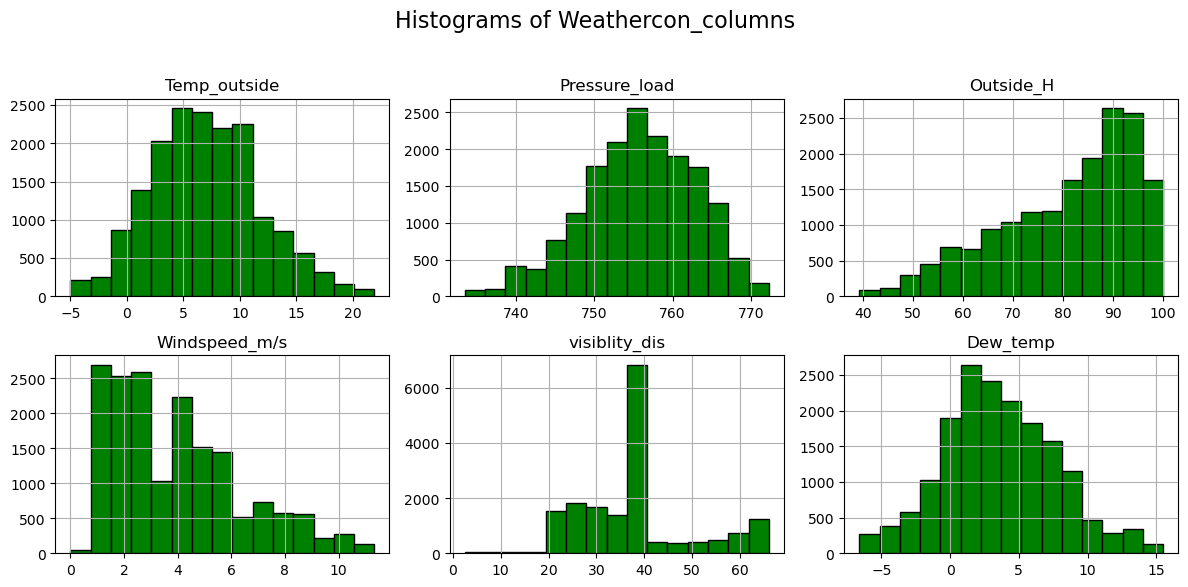

In [288]:
#  Plotting the distribution of diffferent dependent variables of outdoor.
selected_columns = ['Temp_outside', 'Pressure_load','Outside_H', 'Windspeed_m/s', 'visiblity_dis', 'Dew_temp']
plt.figure(figsize=(8, 3))
df_Energy[selected_columns].hist(bins=15, color='Green',edgecolor='black', grid=True, layout=(3, 3), figsize=(12, 8))
plt.suptitle('Histograms of Weathercon_columns', x=0.5, y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Why this specific graph used?
histograms are a powerful tool in data visualization due to their ability to effectively summarize and present data distributions, facilitate pattern recognition, support comparative and quantitative analysis, and maintain simplicity and clarity.

# what are insights of this histogram?
*In first graph of Temp_outside.The x-axis represents the temperature (°C), while the y-axis represents the frequency.
The data shows that the most frequent temperatures fall between 15°C and 20°C.There are also a significant number of temperatures recorded between 10°C and 25°C.

*In second graph of Pressure_load.with the y-axis representing the frequency of each pressure range and the x-axis representing the pressure values. The pressure values range from around 730 to 770, with a peak in frequency around 740-750.

*In third graph outside Humidity.The x-axis represents the humidity level, while the y-axis represents the frequency.
The most frequent humidity is between 50 and 70.There are fewer readings at the extremes of humidity (below 30 and above 90).
It is difficult to say for sure what the average humidity is from this chart, but it appears to be somewhere in the middle range (between 50 and 70).

*In fourth graph windspeed represents.the distribution of wind speeds, with the y-axis representing the frequency of each windspeed range (counts) and the x-axis representing the windspeed in meters per second. The windspeeds range from 0 to 14 meters per second, with a peak in frequency around 6-8 meters per second.

*In fifth graph visiblity represents,the distribution of visitor counts, with the y-axis representing the frequency of each visitor count range and the x-axis representing the number of visitors. The visitor counts range from 0 to around 60, with a peak in frequency around 10-20 visitors.

*In sixth and last graph Dew_temp represents,The x-axis of the chart is the dew point temperature and the  Y-axis is the frequency. The chart shows that the most frequent dew point temperature is between 15 and 20 degrees Celsius. There are also fewer instances of dew point temperatures that are colder than 5 degrees Celsius or hotter than 25 degrees Celsius.
In conclusion, the chart suggests that the dew point temperature data set has a normal distribution with a mode around 17.5 degrees Celsius.


<Figure size 800x300 with 0 Axes>

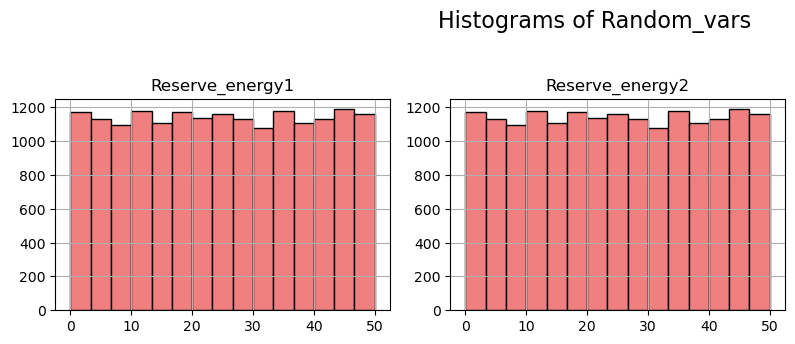

In [289]:
#  Plotting the distribution Temperatures of indoor
selected_columns = ['Reserve_energy1', 'Reserve_energy2']
plt.figure(figsize=(8, 3))
df_Energy[selected_columns].hist(bins=15, color='lightcoral',edgecolor='black', grid=True, layout=(3, 3), figsize=(12, 8))
plt.suptitle('Histograms of Random_vars', x=0.5, y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Why this specific graph used?
Histograms are a powerful tool in data visualization due to their ability to effectively summarize and present data distributions, facilitate pattern recognition, support comparative and quantitative analysis, and maintain simplicity and clarity.
# What are the insights of this histogram chart?
In this graph x-axis represents energy used quantity and y-axis represents that frequency of reserve energy.Reserve energy shows that energy is reserved for backup .It's not showing any pattern in the graph.






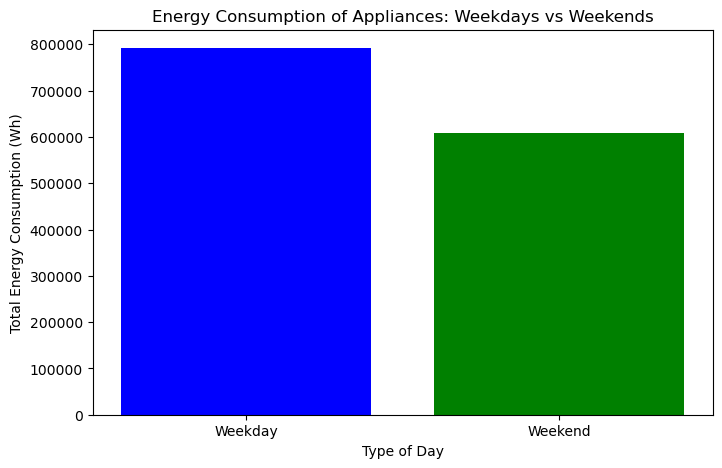

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [290]:
#We used feature engineering for plotting this graph (groupby function used) 
Energy_contr = df_Energy.groupby('type_of_day')['Appliances_energy'].sum()

# Plotting
plt.figure(figsize=(8, 5), facecolor='white')
plt.bar(Energy_contr.index, Energy_contr.values, color=['blue', 'green'])
plt.title('Energy Consumption of Appliances: Weekdays vs Weekends')
plt.xlabel('Type of Day')
plt.ylabel('Total Energy Consumption (Wh)')
plt.show()
df.head()

# Why this specific grapgh used?
Bar plots are typically used to visualize categorical data by displaying the frequency or count of each category.

# what are the insights of this graph?
The insight found from the chart is that the energy consumption of appliances is higher on weekdays than on weekends. This is likely because people are at home more during the day on weekdays, using appliances such as washers, dryers, and dishwashers.

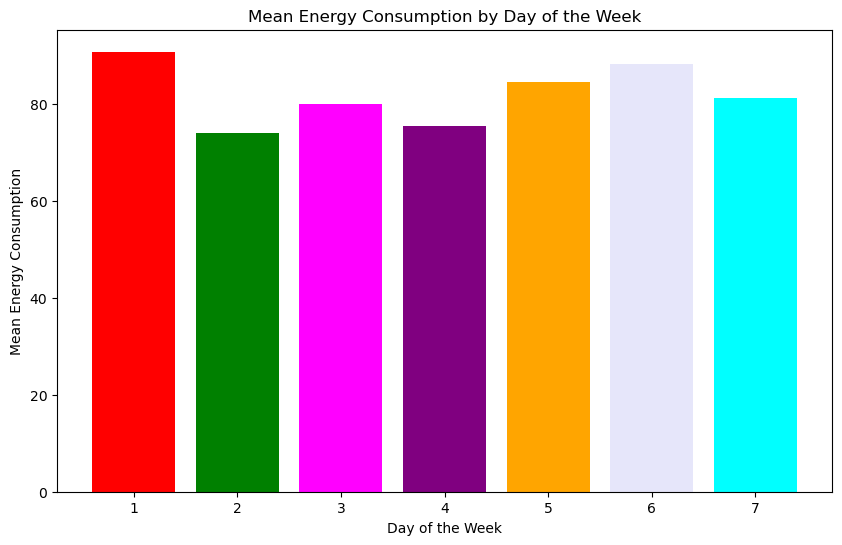

In [291]:
mean_by_weekday = df_Energy.groupby('day_of_week')['Appliances_energy'].mean()

# Your data and plotting code
plt.figure(figsize=(10,6))
colors = ['Red', 'green', 'magenta', 'purple', 'orange', 'lavender', 'cyan']
plt.bar(mean_by_weekday.index, mean_by_weekday.values,color=colors)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Energy Consumption')
plt.title('Mean Energy Consumption by Day of the Week')
plt.show()

# Why this specific grapgh used?
Bar plots are typically used to visualize categorical data by displaying the frequency or count of each category.

# what are the insights of this graph?
Energy consumption is higher on weekdays than weekends. This is likely because people are at home more during the day on weekdays, using appliances and electronics. The lowest energy consumption is on Sundays. There is a significant difference in consumption between weekdays and weekends. This suggests that a large portion of household energy consumption is related to people being home.

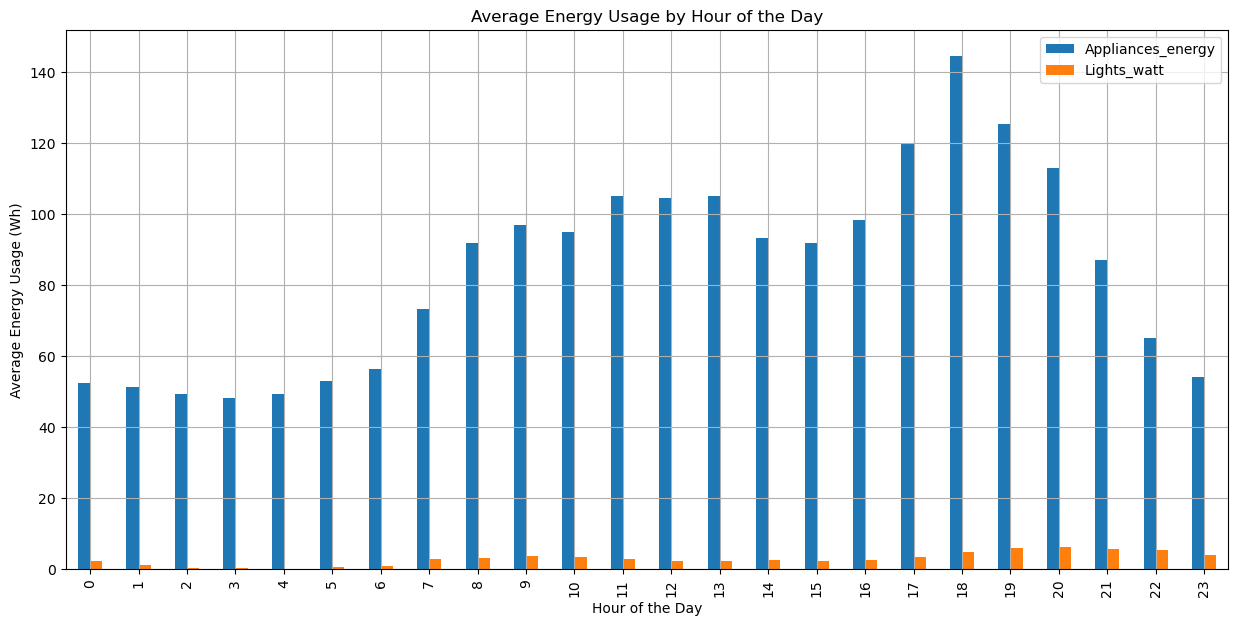

In [292]:
# Grouping by hour to find average energy usage per hour
df_hourly = df_Energy.groupby('hour')[['Appliances_energy', 'Lights_watt']].mean()


# Plotting the average energy usage by hour
df_hourly.plot(kind='bar', figsize=(15, 7), title='Average Energy Usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Usage (Wh)')
plt.grid(True)
plt.show()

# Why this specific graph used?
#Comparing Quantities: Bar charts are excellent for comparing quantities or values across different categories. The length of each bar directly corresponds to the value it represents, making it easy to visually compare. 
#Categorical Data: If the data being represented is categorical, bar charts are often a good choice. Each category can be represented by a separate bar, providing a clear visual distinction between them. 
Ease of Interpretation: Bar charts are intuitive and easy to understand, even for those not familiar with data visualization techniques. The length of the bars provides a clear and straightforward representation of the data. 
#Flexibility: Bar charts can be easily customized to represent different types of data. They can be horizontal or vertical, stacked or grouped, clustered or spaced apart, depending on the specific requirements of the data being visualized. 
#Visibility of Labels: In bar charts, labels for each category or data point can be placed directly on the bars, making it easy to identify the values being represented without the need for a separate legend. 
#Clear Presentation of Trends: Bar charts are effective for showing trends over time or across different categories. Changes in the lengths of the bars are immediately noticeable, allowing viewers to quickly identify patterns or anomalies in the data.
# What are insights of this graph?
The chart you sent shows that average energy usage is higher during weekdays than weekends. This is likely because people are at home more during the day on weekdays, using appliances and electronics.The highest energy usage occurs in the morning and evening hours. This is likely because this is when people are typically waking up, getting ready for work or school, cooking meals, and doing laundry. Energy usage is lowest in the middle of the day. This is likely because people are typically away from home at work or school during this time.


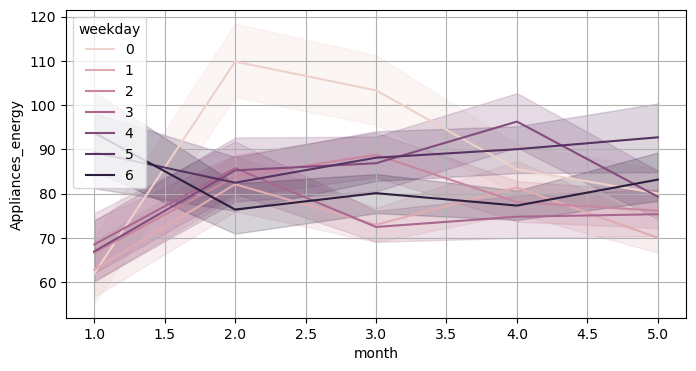

In [293]:
plt.figure(figsize=(8,4))
sns.lineplot(df_Energy,x='month',y='Appliances_energy',hue='weekday')
plt.grid()
plt.show()

# Why this specific graph used?
Line charts are used for the visualization of graphs when the primary focus is on showing trends over time or continuous data points.
# what are the insights of this graph?
In this graph shows on x-axis month status and y-axis shows total appliance energy and In status showing weekdays, showing trends according to weekday ,which day is most using energy(KW).Sunday is the day in which maximum energy is used during second month.

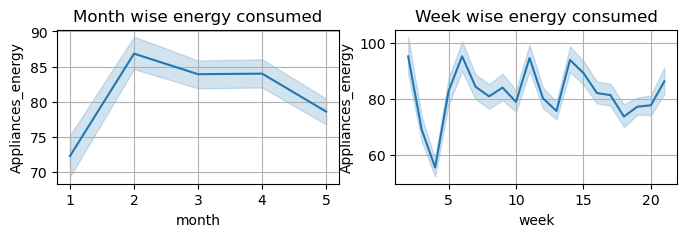

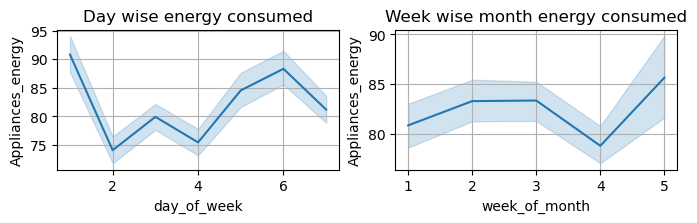

In [294]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.title('Month wise energy consumed')
sns.lineplot(df_Energy,x='month',y='Appliances_energy')
plt.grid()

plt.subplot(1,2,2)
plt.title('Week wise energy consumed')

sns.lineplot(df_Energy,x='week',y='Appliances_energy')
plt.grid()
plt.show()
plt.figure(figsize=(8,4))
plt.subplot(2,2,1)
plt.title('Day wise energy consumed')
sns.lineplot(df_Energy,x='day_of_week',y='Appliances_energy')
plt.grid()

plt.subplot(2,2,2)
plt.title('Week wise month energy consumed')
sns.lineplot(df_Energy,x='week_of_month',y='Appliances_energy')
plt.grid()
plt.show()


# Why this specific graph used?
Line charts are used for the visualization of graphs when the primary focus is on showing trends over time or continuous data points.
# What are the insights of this line chart?
#1st line chart:- on X-axis month and Y-axis Appliance energy conumption(KWh).The trends 1st month low low energy consumption due to winter or climate condition is cool and after that from 2nd month its showing highest consumption of electricity and so on following that trends.
#2nd line chart :-on x-axis week and y-axis Appliance energy consumption(Kwh).The trends showing highly volatile in nature in some weeks showing uptrend and some week low trends.
#3rd line chart :- on x-axis its days of week and y-axis Appliance energy Consumption(Kwh).The trends showing that 1st day of week(sunday) having highest cionsumption of energy and after than monday on ward slowly and by reaching Friday its getting high again.,weekend is having high consumption of energy.
#4th Line chart :- On x-axis week of month and Y-axis Appliance energy consumption.The trends shows that 1st wek of month is less consumption then its getting up and some how low in third and fourth week but in last week of month is having hiighest consumption of energy during a month.

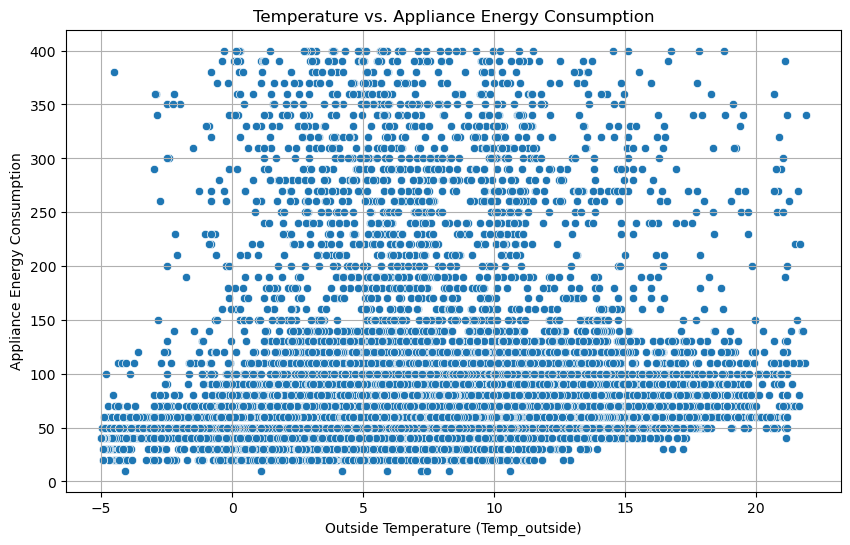

Correlation coefficient between T_out and Appliances: 0.11150057048003033


In [295]:
# Selecting the temperature features and 'Appliances' column
temperature_columns = ['Kitchen_T','Livingroom_T','Laundaryroom_T','Officeroom_T','Bathroom_T','Outside_buil(Northside)_T','Ironingroom_T','Teenagerroom_T','Parentsroom_T','Temp_outside']
df_temp = df_Energy[temperature_columns + ['Appliances_energy']]

# Visualizing the relationship using scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_outside', y='Appliances_energy', data=df_temp)
plt.title('Temperature vs. Appliance Energy Consumption')
plt.xlabel('Outside Temperature (Temp_outside)')
plt.ylabel('Appliance Energy Consumption')
plt.grid(True)
plt.show()

# Calculating the correlation coefficient
correlation = df_temp['Temp_outside'].corr(df_temp['Appliances_energy'])
print("Correlation coefficient between T_out and Appliances:", correlation)

# Why did you pick the specific chart
Scatter plots are useful for revealing relationships between two variables. In this case, the relationship between temperature (x-axis) and appliance energy consumption (y-axis) is being explored. Scatter plots can visually identify trends or patterns in the data. For instance, the chart might show a trend of increasing energy consumption with increasing temperature, suggesting that appliances work harder in warmer weather. Scatter plots can also reveal outliers in the data. Outliers are data points that fall far away from the main cluster of points. These outliers could indicate malfunctioning appliances or unusual events that need further investigation.
# What is/are the insight(s) found from the chart
scatter plot, not a line chart, investigating the relationship between appliance energy consumption and outside temperature. Here are the insights found from the chart:

Weak correlation: The correlation coefficient between appliance energy consumption and outside temperature is 0.111, which is a very weak correlation. This means that there is very little relationship between the two variables.

Positive correlation: There appears to be a slight positive correlation between temperature and energy consumption. This means that as the outside temperature increases, appliance energy consumption also tends to increase. However, the correlation is so weak that it may not be statistically significant.

In [296]:
df_Energy.columns

Index(['Appliances_energy', 'Lights_watt', 'Kitchen_T', 'Kitchen_H',
       'Livingroom_T', 'Livingroom_H', 'Laundaryroom_T', 'Laundaryroom_H',
       'Officeroom_T', 'Officeroom_H', 'Bathroom_T', 'Bathroom_H',
       'Outside_buil(Northside)_T', 'Outside_buil(Northside)_H',
       'Ironingroom_T', 'Ironingroom_H', 'Teenagerroom_T', 'Teenagerroom_H',
       'Parentsroom_T', 'Parentsroom_H', 'Temp_outside', 'Pressure_load',
       'Outside_H', 'Windspeed_m/s', 'visiblity_dis', 'Dew_temp',
       'Reserve_energy1', 'Reserve_energy2', 'month', 'weekday', 'hour',
       'week', 'day_of_week', 'week_of_month', 'type_of_day'],
      dtype='object')

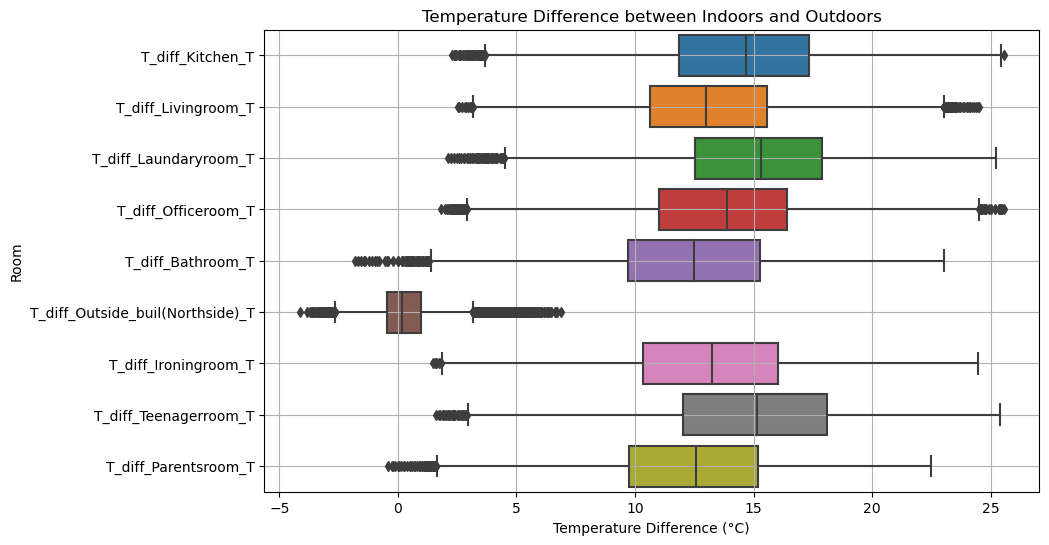

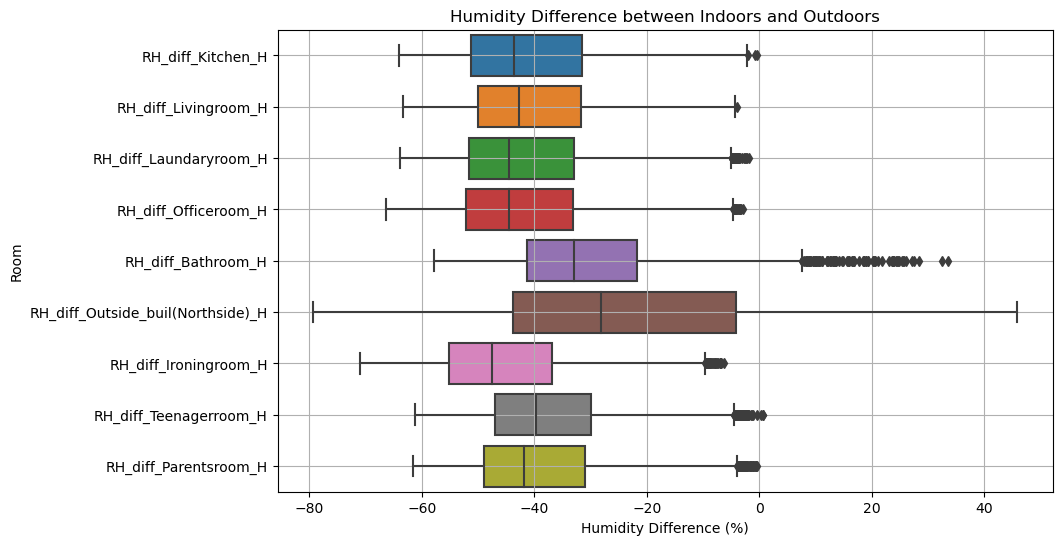

In [297]:
# Calculate temperature and humidity differences between indoors and outdoors
temp_columns = ['Kitchen_T', 'Livingroom_T', 'Laundaryroom_T', 'Officeroom_T', 'Bathroom_T', 'Outside_buil(Northside)_T', 'Ironingroom_T', 'Teenagerroom_T', 'Parentsroom_T']
for col in temp_columns:
    df_Energy[f'T_diff_{col}'] = df_Energy[col] - df_Energy['Temp_outside']

humidity_columns = ['Kitchen_H', 'Livingroom_H', 'Laundaryroom_H', 'Officeroom_H', 'Bathroom_H', 'Outside_buil(Northside)_H', 'Ironingroom_H', 'Teenagerroom_H', 'Parentsroom_H']
for col in humidity_columns:
    df_Energy[f'RH_diff_{col}'] = df_Energy[col] - df_Energy['Outside_H']


# Plotting temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_Energy.filter(like='T_diff'), orient='h')
plt.title('Temperature Difference between Indoors and Outdoors')
plt.xlabel('Temperature Difference (°C)')
plt.ylabel('Room')
plt.grid(True)
plt.show()

# Plotting humidity differences
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_Energy.filter(like='RH_diff'), orient='h')
plt.title('Humidity Difference between Indoors and Outdoors')
plt.xlabel('Humidity Difference (%)')
plt.ylabel('Room')
plt.grid(True)
plt.show()

# Why did you pick the specific chart?
I chosen boxplots for visualizing the temperature and humidity differences between indoors and outdoors for a few reasons:

Comparison of distributions: Boxplots provide a clear comparison of the distribution of temperature and humidity differences across different rooms.

Summary statistics: Boxplots display summary statistics such as the median, quartiles, and potential outliers

# What is/are the insights found from the chart?
From the temperature and humidity difference charts between indoors and outdoors, you can glean several insights:

Temperature Differences: The boxplot indicates how much hotter or colder it is indoors compared to outdoors across different rooms. Positive values suggest indoor temperatures are higher than outdoor temperatures, while negative values indicate the opposite. Rooms with positive median temperature differences may have heating systems or receive more sunlight, leading to warmer indoor temperatures. Rooms with negative median temperature differences may have poor insulation or ventilation, allowing outdoor temperatures to influence indoor conditions more directly. Humidity Differences: The boxplot illustrates the variation in humidity levels between indoors and outdoors across different rooms. Positive values signify higher indoor humidity compared to outdoor humidity, while negative values suggest lower indoor humidity. Rooms with positive median humidity differences might have activities like cooking, bathing, or using humidifiers, contributing to increased indoor humidity levels. Rooms with negative median humidity differences may be well-ventilated or have dehumidifiers, leading to lower indoor humidity levels compared to the outdoor environment.

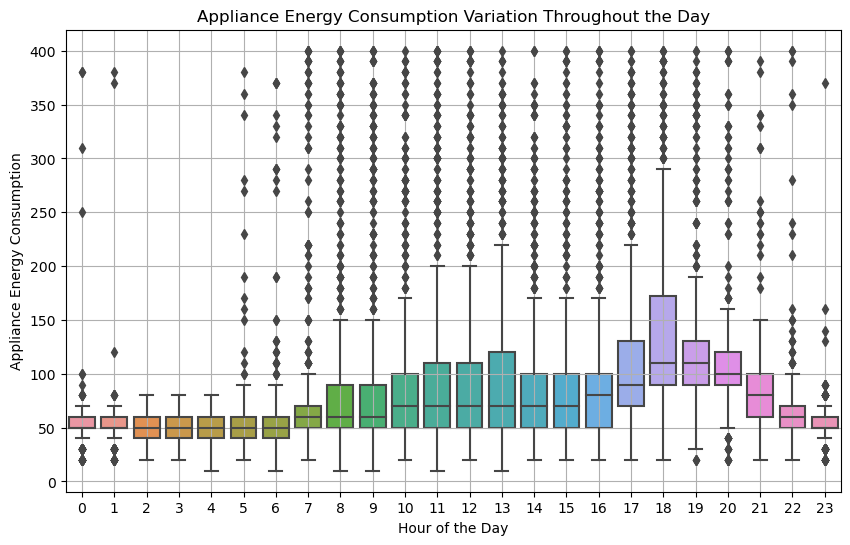

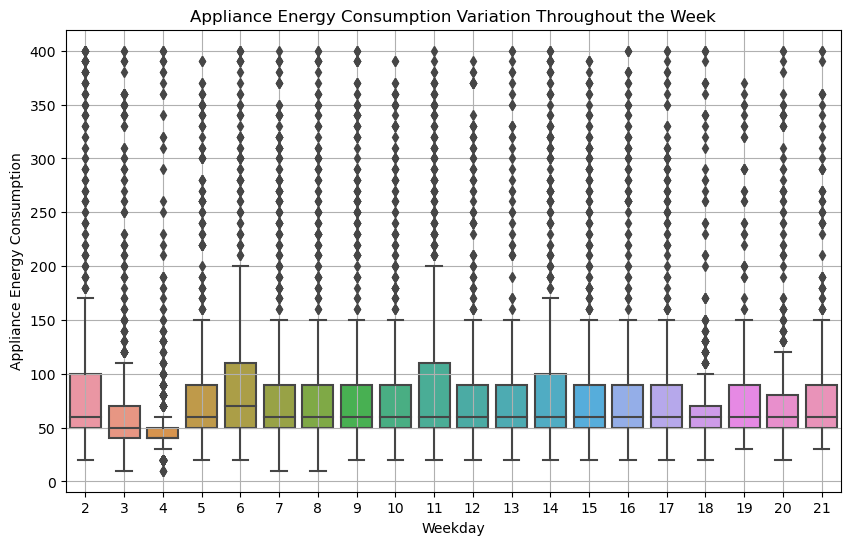

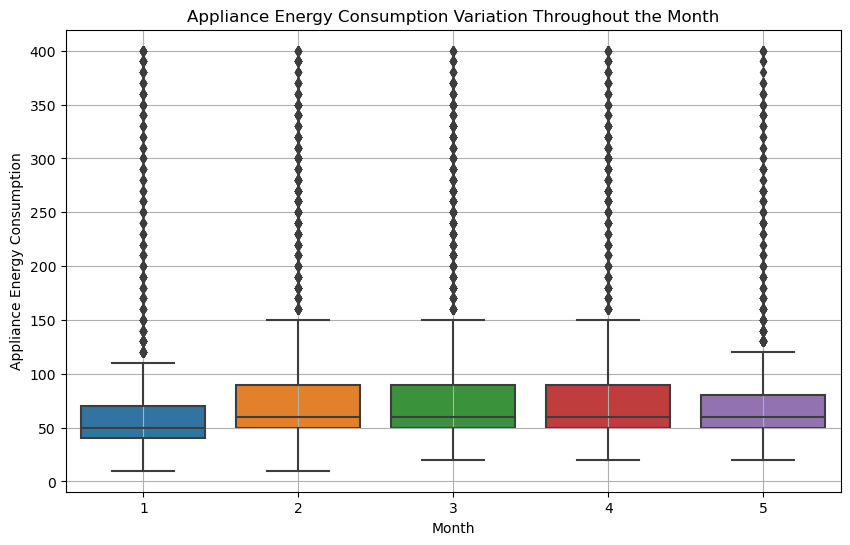

In [298]:
# Assuming you have a DataFrame named df containing 'hour', 'weekday', 'month', and 'Appliances' columns

# Box plot for appliance energy consumption variation throughout the day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='Appliances_energy', data=df_Energy)
plt.title('Appliance Energy Consumption Variation Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Appliance Energy Consumption')
plt.grid(True)
plt.show()
# Box plot for appliance energy consumption variation throughout the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='week', y='Appliances_energy', data=df_Energy)
plt.title('Appliance Energy Consumption Variation Throughout the Week')
plt.xlabel('Weekday')
plt.ylabel('Appliance Energy Consumption')
plt.grid(True)
plt.show()

# Box plot for appliance energy consumption variation throughout the month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Appliances_energy', data=df_Energy)
plt.title('Appliance Energy Consumption Variation Throughout the Month')
plt.xlabel('Month')
plt.ylabel('Appliance Energy Consumption')
plt.grid(True)

# Why did you pick the specific chart
Each of these box plots serves a different purpose in visualizing the variation in appliance energy consumption:

Hourly Variation: This plot helps in understanding how appliance energy consumption varies throughout the day. It can reveal patterns such as peak usage hours or periods of low energy consumption. Weekly Variation: By plotting energy consumption against weekdays, you can identify if there are specific days of the week when appliance usage is higher or lower. This can be useful for identifying trends related to weekdays versus weekends, for example. Monthly Variation: This plot provides insight into how appliance energy consumption changes across different months. Seasonal patterns or changes in energy consumption habits over longer periods can be observed here. Each of these visualizations provides a different perspective on appliance energy consumption patterns, helping to uncover trends and insights that might not be apparent from looking at the data alone.

# What is/are the insight(s) found from the chart
From these box plots, several insights can be gleaned:

Hourly Variation: The first plot shows the variation in appliance energy consumption throughout the day. It appears that energy consumption varies significantly depending on the hour. For example, there may be higher consumption during peak usage times such as in the evening when people are cooking dinner or using appliances like dishwashers and laundry machines. Weekly Variation: The second plot depicts how appliance energy consumption varies throughout the week. This can reveal patterns related to weekdays versus weekends. There may be higher consumption during weekdays when occupants are typically more active and using appliances for daily tasks compared to weekends when there might be more leisure time and less appliance usage. Monthly Variation: The third plot illustrates how appliance energy consumption varies across different months. Seasonal patterns could be observed here. For instance, there might be higher energy usage during summer months when air conditioning systems are running more frequently, or during winter months when heating systems are in use. These insights can help identify trends and patterns in appliance energy consumption, which can be valuable for optimizing energy usage, identifying potential inefficiencies, and making informed decisions about energy management strategies.

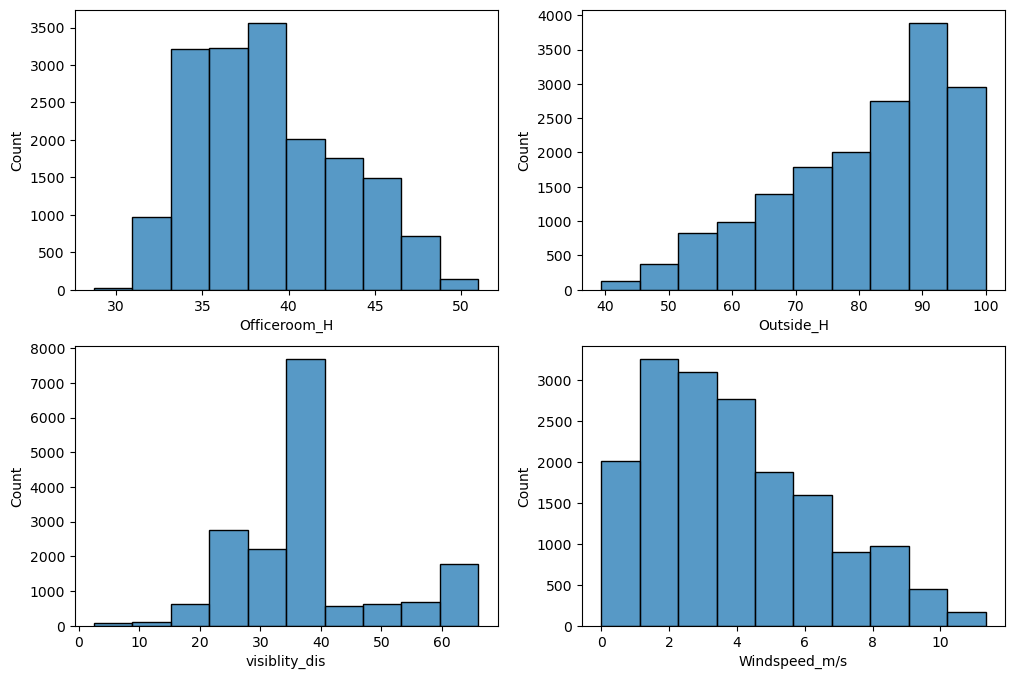

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

# Focused displots for RH_6, RH_out, Windspeed_m/s, visiblity_dis due to irregular distribution
f, ax = plt.subplots(2, 2, figsize=(12, 8))
vis1 = sns.histplot(df_Energy["Officeroom_H"], bins=10, kde=False, ax=ax[0][0])
vis2 = sns.histplot(df_Energy["Outside_H"], bins=10, kde=False, ax=ax[0][1])
vis3 = sns.histplot(df_Energy["visiblity_dis"], bins=10, kde=False, ax=ax[1][0])
vis4 = sns.histplot(df_Energy["Windspeed_m/s"], bins=10, kde=False, ax=ax[1][1])
plt.show()

# Why this specific graph used?

Using distplot (or displot/histplot in modern Seaborn) provides a powerful way to visualize and understand the distribution of your data. This helps in identifying key statistical properties, detecting outliers, and comparing distributions, which are crucial steps in data exploration and preprocessing.

# what are the insights from this graph?

The distribution plots reveal insights into the spread and shape of the data:

Officeroom_H:
*  Skewed right, suggesting concentration towards lower values.
*  Potential outliers at higher values.

Outside_H:
*   Symmetric distribution with a noticeable peak.
*   Majority of data clustered around a central value.

Visibility:
*  Heavily skewed right, indicating predominantly low visibility.
*  Few instances of higher visibility, potentially outliers.

Windspeed:

* Symmetric distribution with no distinct peak.
* Spread of values without significant skewness or outliers

C:\Users\kriti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


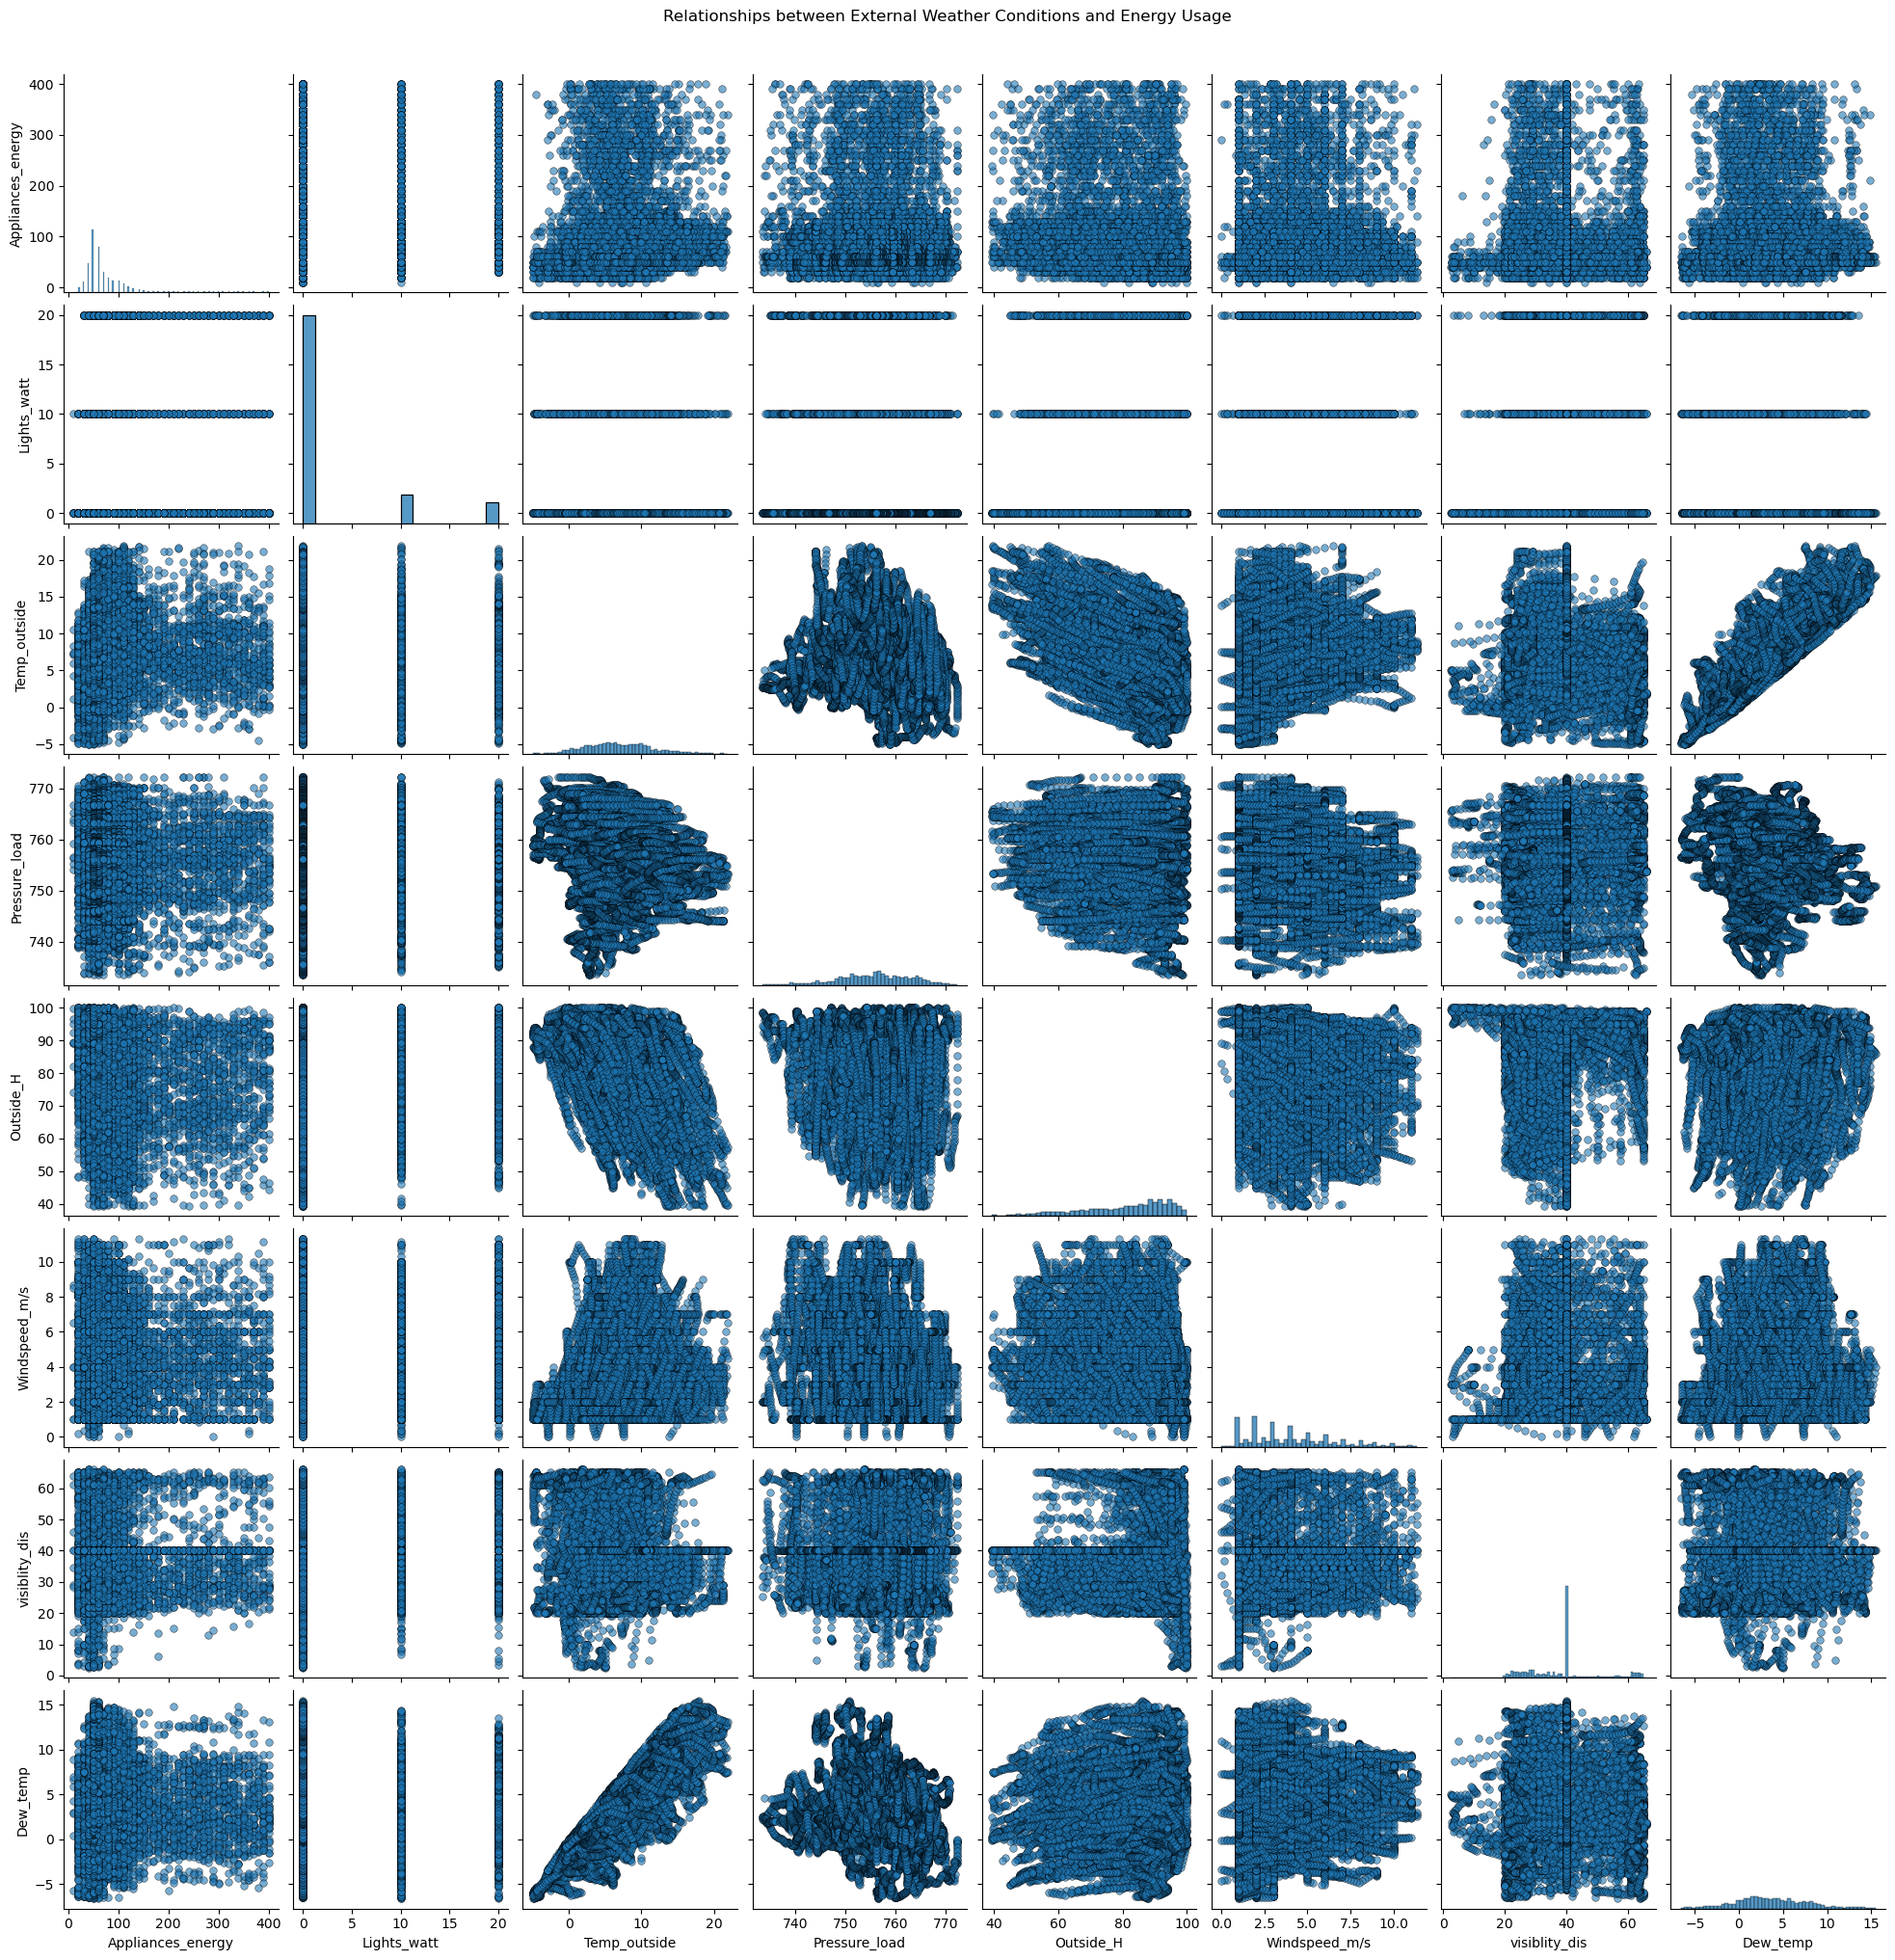

In [300]:
#cols = ['Appliances_energy', 'Lights_watt','Temp_outside', 'Pressure_load','Outside_H', 'Windspeed_m/s', 'visiblity_dis', 'Dew_temp']

# Pairplot to visualize the relationships
#sns.pairplot(df_Energy[cols], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.6, 's':30, 'edgecolor':'k'}, diag_kws={'shade':True})
#plt.suptitle('Relationships between External Weather Conditions and Energy Usage', y=1.02)
#plt.show()

cols = ['Appliances_energy', 'Lights_watt','Temp_outside', 'Pressure_load','Outside_H', 'Windspeed_m/s', 'visiblity_dis', 'Dew_temp']

# Pairplot to visualize the relationships
sns.pairplot(df_Energy[cols], kind='scatter', plot_kws={'alpha':0.6, 's':30, 'edgecolor':'k'})
plt.suptitle('Relationships between External Weather Conditions and Energy Usage', y=1.02)
plt.show()



# Why this specific graph used?
Pairplots are a versatile and powerful tool in data visualization, especially useful in the exploratory data analysis (EDA) phase. Here are several benefits of using pairplots:

Comprehensive Variable Comparison:
Pairplots provide a matrix of scatterplots, allowing you to visualize the relationships between all pairs of variables in a dataset. This comprehensive comparison can reveal patterns, correlations, and outliers across multiple dimensions.

Correlation Detection:
By displaying scatterplots for each pair of variables, pairplots make it easier to spot linear or non-linear relationships and correlations between variables. This helps in understanding how variables might influence each other.

Distribution Insights:
Pairplots include histograms or density plots on the diagonal, showing the distribution of individual variables. This helps in understanding the spread and skewness of the data for each variable.

Outlier Identification:
The scatterplots in a pairplot can reveal outliers that may not be obvious in univariate plots. Identifying outliers is crucial for cleaning data and improving the performance of predictive models.

Categorical Hue Support:
Pairplots can color-code data points based on categorical variables using the hue parameter. This allows for visual separation of different categories and helps in understanding how categories differ across multiple variables.

Pattern and Trend Visualization:
They help in detecting patterns and trends within the data, which can be crucial for feature engineering and model selection. For example, you might notice that certain variables form clusters or follow specific trends.

Quick and Easy to Generate:
Pairplots are relatively easy to create using libraries like Seaborn in Python. This makes them a quick and efficient way to gain insights without extensive coding or complex configurations.

Multidimensional Insight:
While most plots are limited to one or two dimensions, pairplots extend the capability to multiple dimensions, offering a more holistic view of the data's structure.

Support for Large Datasets:
While dense datasets can make scatterplots cluttered, pairplots often still provide valuable insights, especially when combined with techniques like alpha blending to handle overplotting.

Enhanced Data Understanding:
Overall, pairplots enhance your understanding of the dataset by providing a visual summary that highlights the intricate relationships and distributions within the data. This aids in better decision-making for subsequent data processing and analysis steps.

# what are the different insights from this chart?
This code will generate a pairplot that visualizes the relationships between the specified external weather conditions and energy usage, helping you to explore correlations and distributions in your dataset effectively.
